# CNN for acoustic scene classfication: my home

Date: March 21, 2019

Neural network: input MFSCs to CNN

## Preparing data set for CNN

In [43]:
DATASET_FOLDER = '../dataset/data_my_home'

%run ../oscilloscope/script/dataset.py

ds = DataSet(DATASET_FOLDER)
train_data, train_labels, test_data, test_labels = ds.generate(flatten=False)
shape = ds.shape
class_labels = ds.class_labels
class_labels

['chat',
 'reading',
 'watching_tv',
 'snort',
 'cocking',
 'hamster',
 'silence',
 'vacuum_cleaner',
 'shower',
 'washing_machine',
 'doing_the_dishes']

((880, 64, 40, 1), (440, 64, 40, 1))

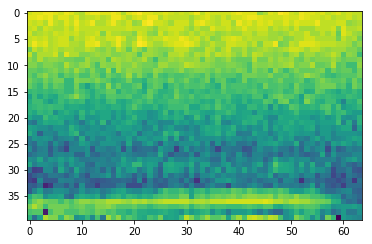

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(np.rot90(train_data[0].reshape(ds.shape)))
train_data.shape, test_data.shape

### CNN model

In [106]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(*shape, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(class_labels), activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 62, 38, 8)         80        
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 31, 19, 8)         0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 31, 19, 8)         0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 29, 17, 16)        1168      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 14, 8, 16)         0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 14, 8, 16)         0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 12, 6, 32)         4640      
__________

In [107]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

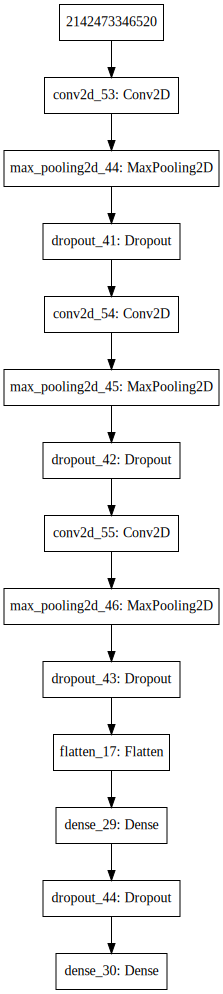

In [108]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Training CNN

In [109]:
EPOCHS = 50
history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_data=(test_data, test_labels))

Train on 880 samples, validate on 440 samples
Epoch 1/50
880/880 [==============================] - 28s 32ms/step - loss: 2.2792 - acc: 0.1364 - val_loss: 2.0389 - val_acc: 0.3409
Epoch 2/50
880/880 [==============================] - 27s 30ms/step - loss: 1.8516 - acc: 0.3318 - val_loss: 1.6167 - val_acc: 0.5705
Epoch 3/50
880/880 [==============================] - 27s 30ms/step - loss: 1.5736 - acc: 0.4261 - val_loss: 1.3874 - val_acc: 0.6432
Epoch 4/50
880/880 [==============================] - 27s 31ms/step - loss: 1.3776 - acc: 0.5148 - val_loss: 1.2944 - val_acc: 0.5682
Epoch 5/50
880/880 [==============================] - 27s 31ms/step - loss: 1.2348 - acc: 0.5591 - val_loss: 1.1987 - val_acc: 0.5818
Epoch 6/50
880/880 [==============================] - 27s 31ms/step - loss: 1.0819 - acc: 0.6159 - val_loss: 1.1282 - val_acc: 0.6250
Epoch 7/50
880/880 [==============================] - 26s 30ms/step - loss: 1.0042 - acc: 0.6534 - val_loss: 0.9059 - val_acc: 0.6727
Epoch 8/50
880/8

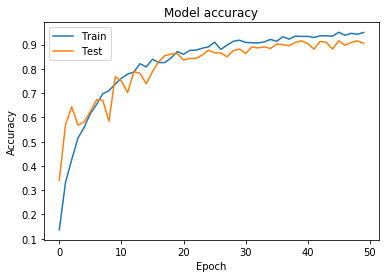

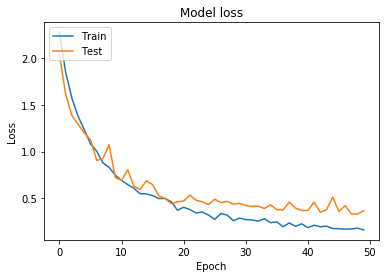

In [110]:
%run history.py
%matplotlib inline

plot_accuracy(history)
plot_loss(history)

## Save the model

In [111]:
import datetime

dt = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
filename = DATASET_FOLDER + '/cnn_for_aed_my_home{}.h5'.format(dt)
model.save(filename)

## Load the model

In [112]:
del model
model = models.load_model(filename)

## Confirmation

In [113]:
import numpy as np
import matplotlib.pyplot as plt

In [114]:
layer_outputs = [layer.output for layer in model.layers]
#layer_outputs

In [115]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_data)
#activations[0][0,:,:,0].shape

In [116]:
class_labels

['chat',
 'reading',
 'watching_tv',
 'snort',
 'cocking',
 'hamster',
 'silence',
 'vacuum_cleaner',
 'shower',
 'washing_machine',
 'doing_the_dishes']

In [117]:
(activations[-1][:10]*100).astype(int)

array([[  0,   0,   0,   0,   0,   0,   0,  99,   0,   0,   0],
       [  0,   0,   0,  99,   0,   0,   0,   0,   0,   0,   0],
       [  0,   6,   0,   0,  82,   2,   8,   0,   0,   0,   0],
       [  0,   0,   0,  99,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  99,   0,   0,   0,   0,   0,   0,   0],
       [ 99,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 13,   0,  86,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  99,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 100,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  99,   0,   0]])

In [118]:
test_labels[:10].astype(int)

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

In [119]:
%run ./plot_layer.py

'chat'

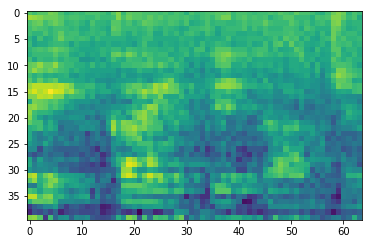

In [120]:
image_number = 5

plt.imshow(np.rot90(test_data[image_number,:,:,0]))
class_labels[np.argmax(test_labels[image_number])]

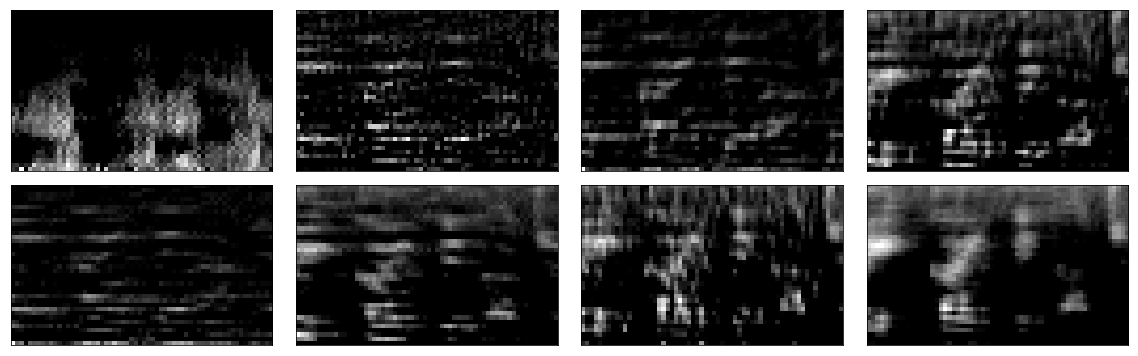

In [121]:
plot_layer(activations, image_number, 0, 4)

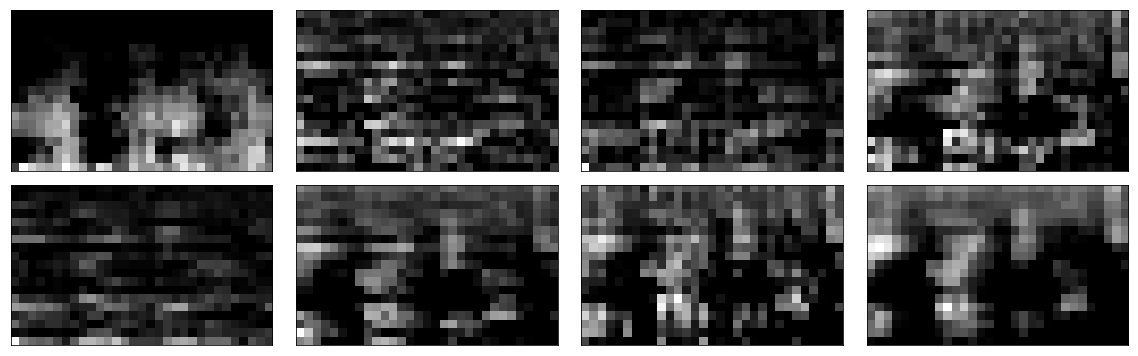

In [122]:
plot_layer(activations, image_number, 1, 4)

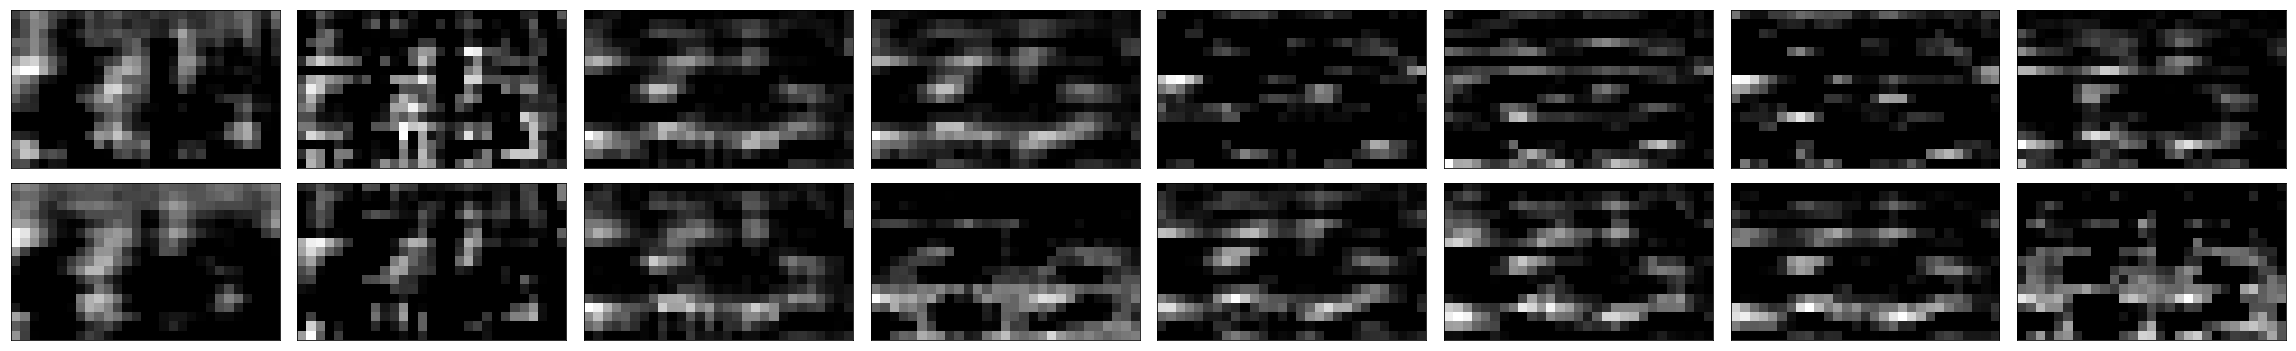

In [123]:
plot_layer(activations, image_number, 3, 8)

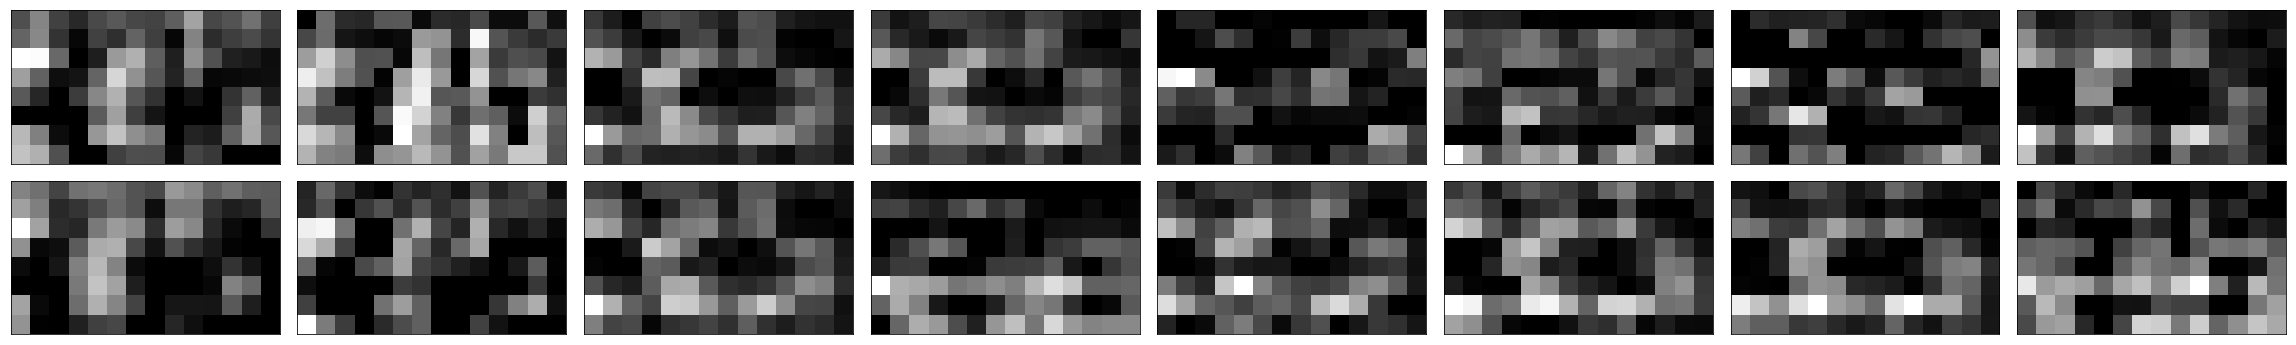

In [124]:
plot_layer(activations, image_number, 4, 8)

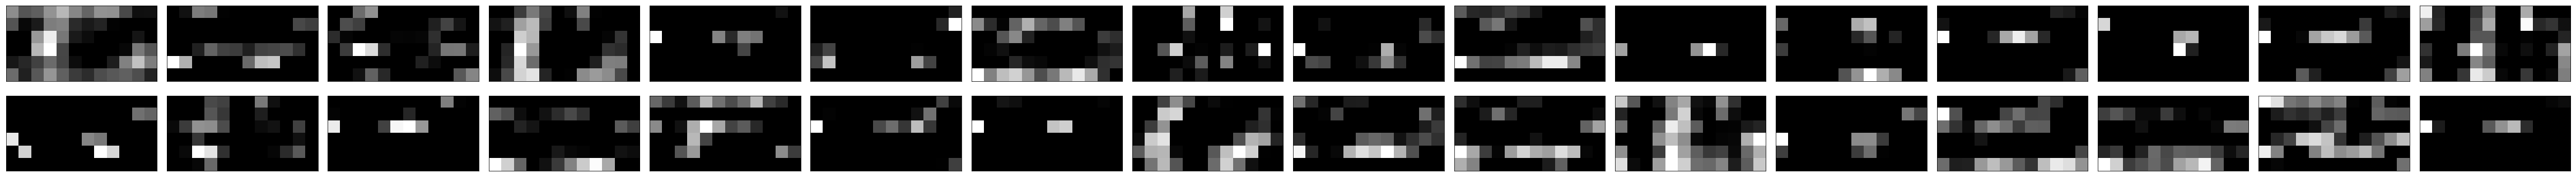

In [125]:
plot_layer(activations, image_number, 6, 16)

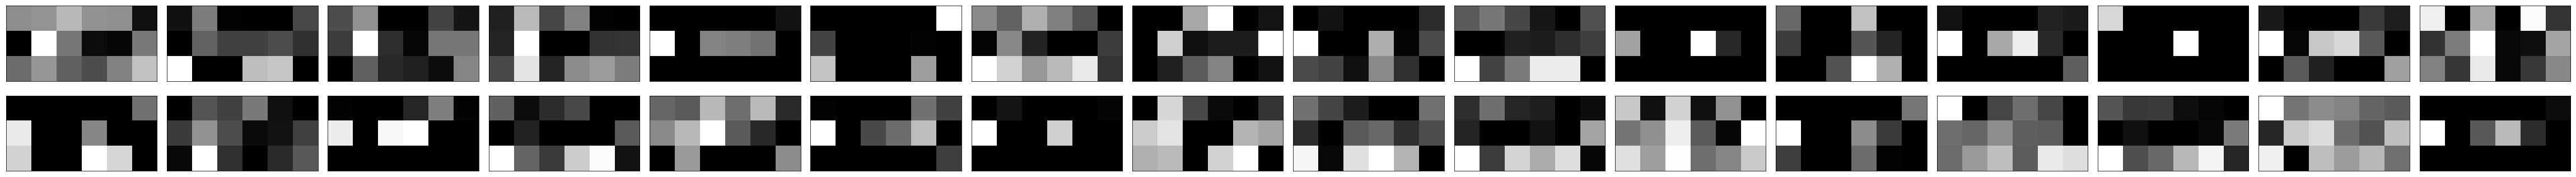

In [126]:
plot_layer(activations, image_number, 7, 16)